<a href="https://colab.research.google.com/github/RachapalliMounvithaLakshmi/Unified-Mentor/blob/main/Personalized_Health_care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/blood.csv')

# Display basic info and stats
print(data.info())
print(data.describe())
print("Missing values:\n", data.isnull().sum())
print("Target distribution:\n", data['Class'].value_counts(normalize=True))

# Split features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (mean=0, var=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.00000

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       114
           1       0.57      0.11      0.19        36

    accuracy                           0.77       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.73      0.77      0.70       150



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       114
           1       0.45      0.36      0.40        36

    accuracy                           0.74       150
   macro avg       0.63      0.61      0.62       150
weighted avg       0.72      0.74      0.73       150



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test_scaled)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=0))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       114
           1       0.59      0.36      0.45        36

    accuracy                           0.79       150
   macro avg       0.71      0.64      0.66       150
weighted avg       0.77      0.79      0.77       150



In [ ]:
from sklearn.svm import SVC

# Initialize and train model
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test_scaled)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       114
           1       0.60      0.08      0.15        36

    accuracy                           0.77       150
   macro avg       0.69      0.53      0.51       150
weighted avg       0.73      0.77      0.69       150



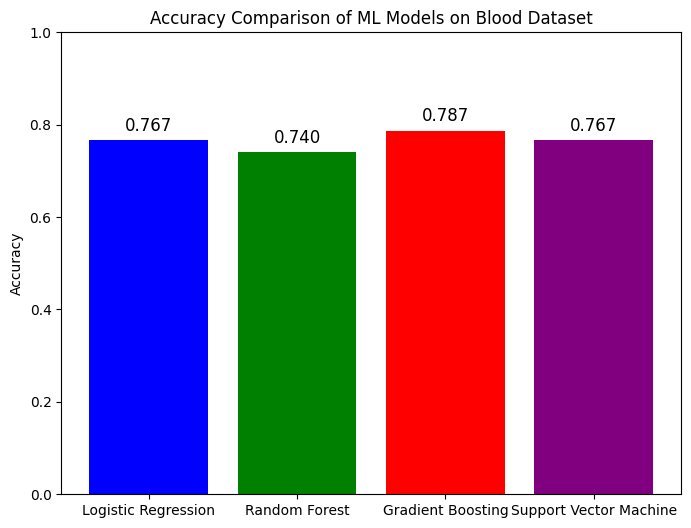

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine']

# Corresponding accuracy scores
accuracies = [0.767, 0.74, 0.787, 0.767]

# Create bar chart
plt.figure(figsize=(8,6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of ML Models on Blood Dataset')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=12)
plt.show()
